In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Importing and observing the data
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Checking the types of data in each column
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Checking for Nan Values in data
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Shape of the data
dataset.shape

(768, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Observing the values in each columns
dataset.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
dataset.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
dataset.SkinThickness.value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

We can see there are 227 zeores in skin thickness column. It must me missing values. 

In [10]:
dataset.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

Similarly, there are 374 zeroes in Insulin level column which is another missing value.

In [11]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Converting missing values having value 0 into NaN(Not a Number)

In [25]:
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [26]:
# Checking the  number of null values again.
dataset.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
# Fillng the missing data with the median of each column.
dataset["Glucose"].fillna(dataset["Glucose"].median(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].median(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].median(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].median(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].median(), inplace = True)

In [28]:
# Missing data handled
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
# Checking the values of target Column.
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [70]:
import warnings
warnings.filterwarnings('ignore')

## Visualization

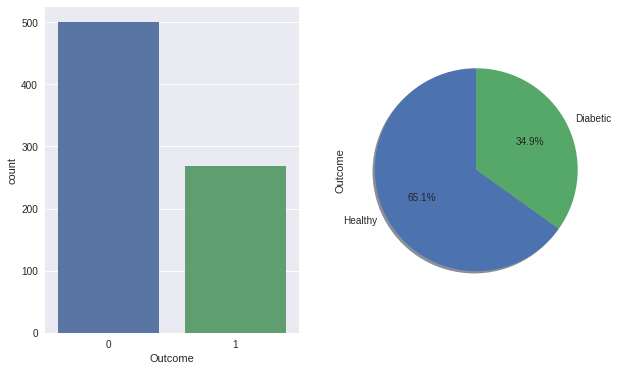

In [71]:
# Visualising the target column's values
plt.style.use("seaborn")
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))
sns.countplot(dataset["Outcome"], ax = ax1[0])
labels = ["Healthy", "Diabetic"]
dataset.Outcome.value_counts().plot.pie(labels=labels, autopct='%.1f%%',shadow=True, startangle=90)
plt.show()

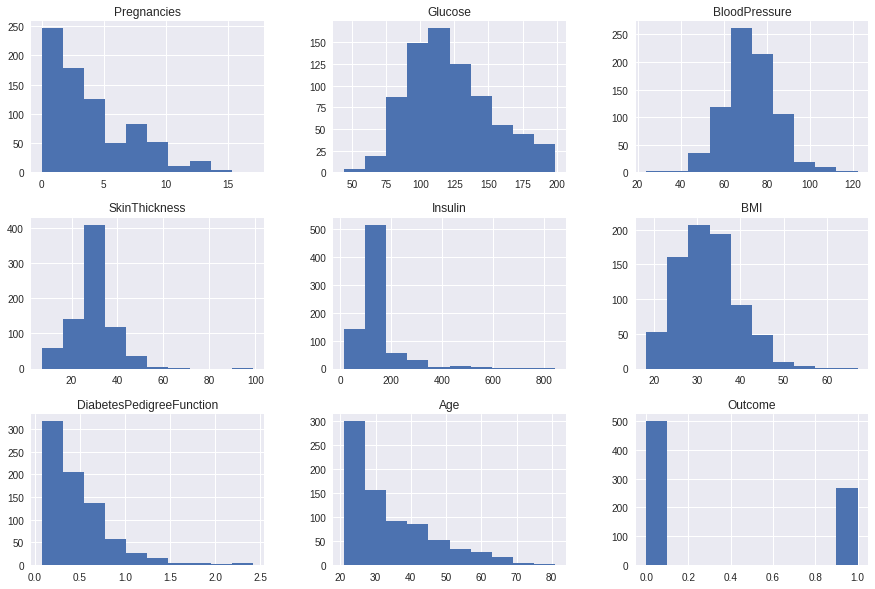

In [72]:
# Checking the distribution of features
dataset.hist(figsize = (15,10))
plt.show()

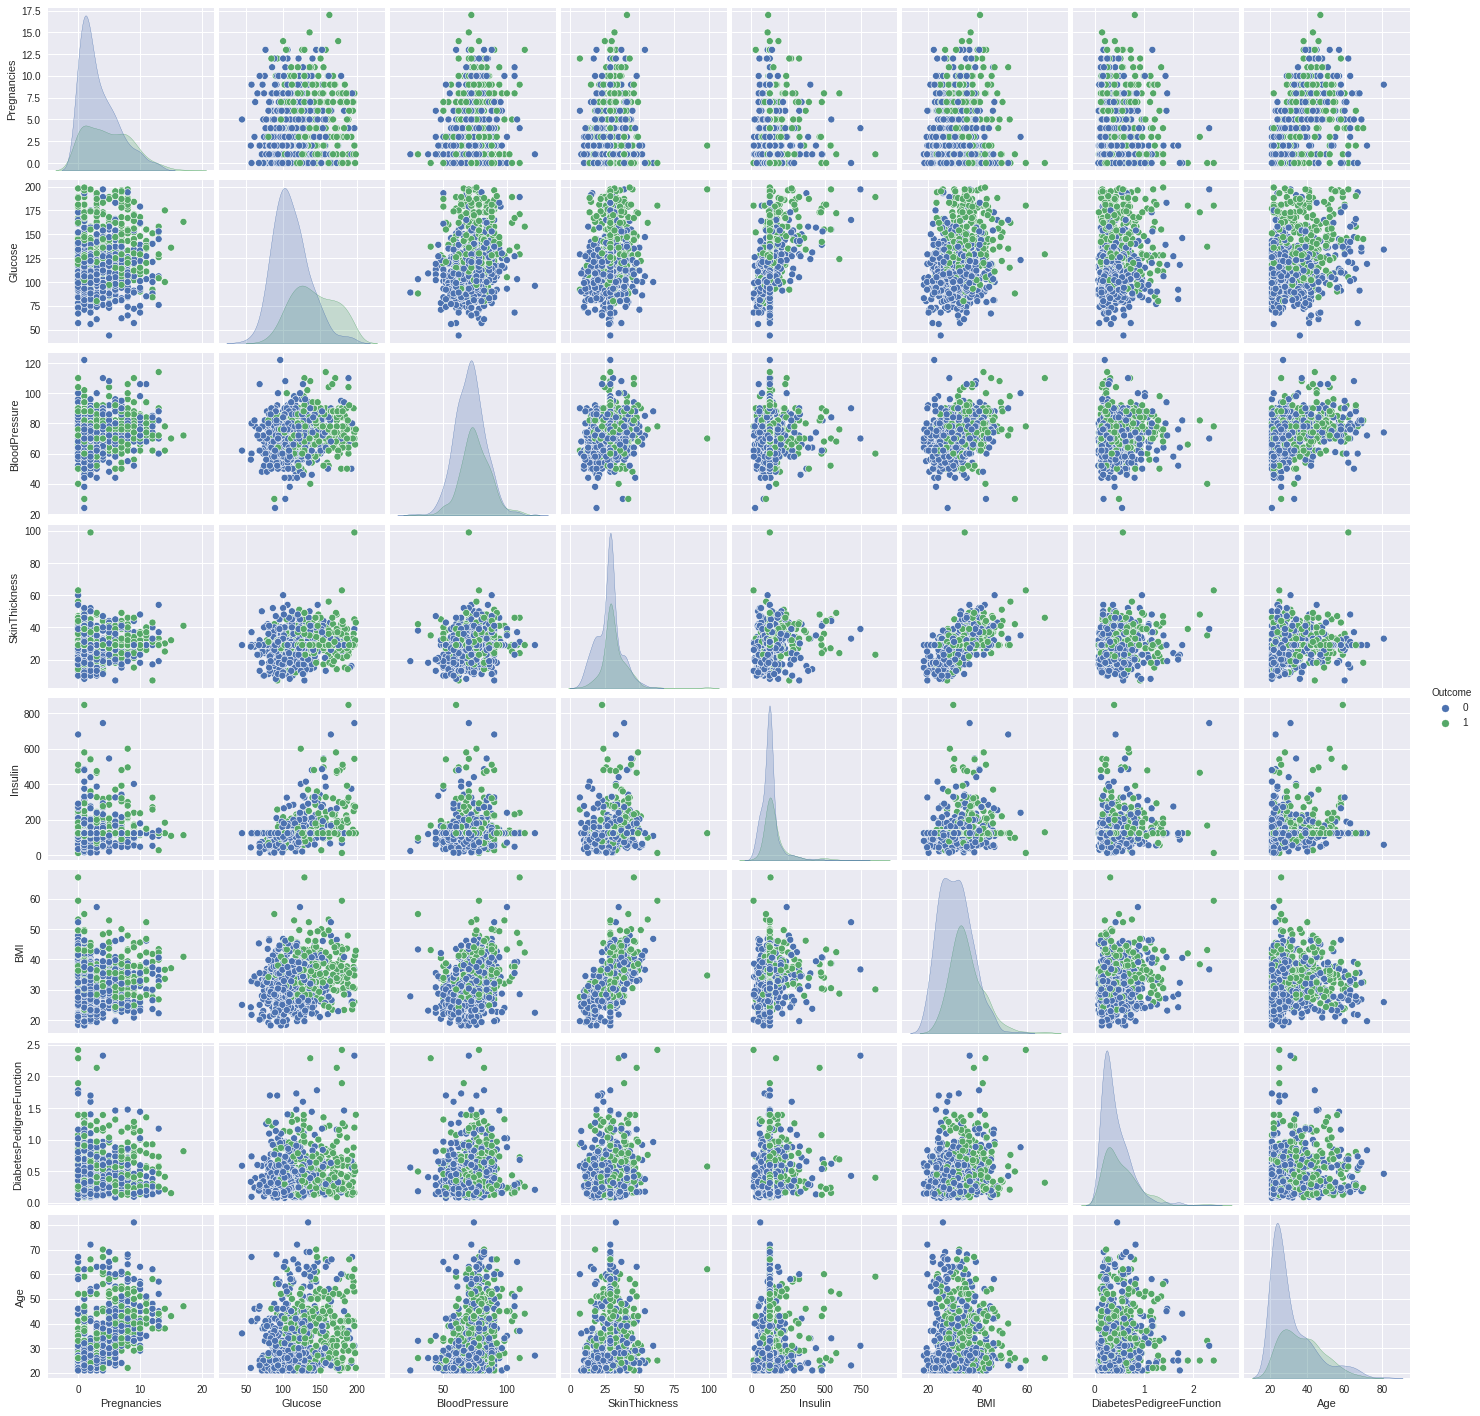

In [73]:
# Pairplots on the basis of the target value
sns.pairplot(dataset, hue = "Outcome")
plt.show()

In [74]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

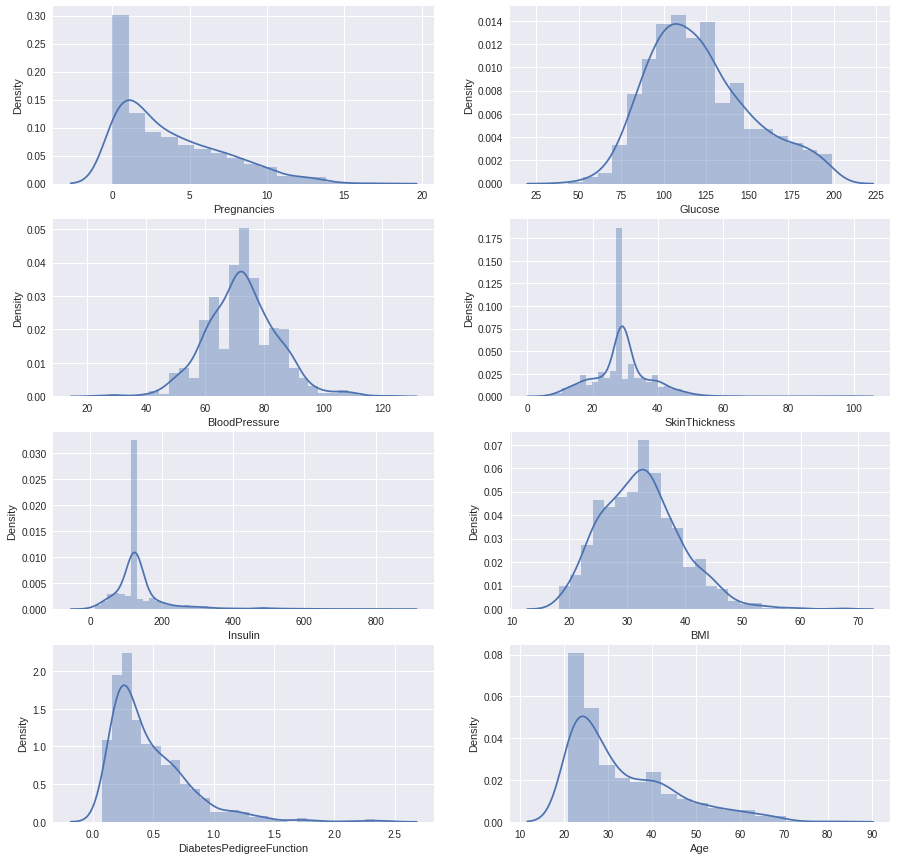

In [75]:
# Observing the features Distribution with distplot
fig, ((ax1, ax2),(ax3,ax4), (ax5,ax6),(ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
sns.distplot(dataset["Pregnancies"], ax = ax1)
sns.distplot(dataset["Glucose"], ax = ax2)
sns.distplot(dataset["BloodPressure"], ax = ax3)
sns.distplot(dataset["SkinThickness"], ax = ax4)
sns.distplot(dataset.Insulin, ax = ax5)
sns.distplot(dataset.BMI, ax = ax6)
sns.distplot(dataset.DiabetesPedigreeFunction, ax = ax7)
sns.distplot(dataset.Age, ax = ax8)
plt.show()

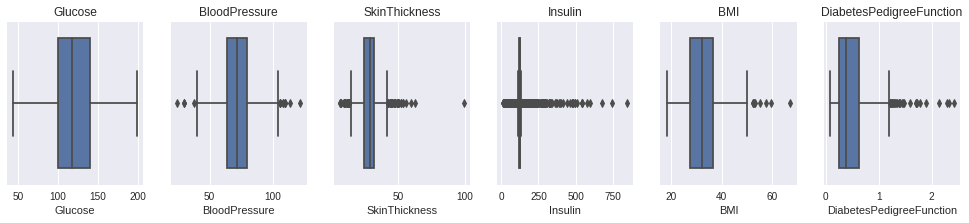

In [83]:
# Checking for outliers in each features
fig = plt.figure(figsize = (20,3))
for i in range(1,7):
    data3=plt.subplot(1,7,i,title=dataset.columns[i])
    sns.boxplot(dataset[dataset.columns[i]])